# FMCW Radar with Non-Linear Chirp

This is a basic FMCW radar simulation example based on `RadarSimPy`.

>`RadarSimPy` is a radar simulation package built with python. **<a href="https://zpeng.me/#contact" target="_blank">Contact me</a> if you are interested in this module.**

This notebook is available on my <a href="https://github.com/rookiepeng/radar-simulation-notebooks" target="_blank">GitHub</a>.


## Radar Model
### Transmitter

The following table lists the basic parameters of the radar transmitter.

 | Parameter                       | Variable in `RadarSimPy` | Value      |
 |---------------------------------|--------------------------|------------|
 | Center frequency ($f_c$)        | fc                       | 24.125 GHz |
 | Bandwidth ($B$)                 | bandwidth                | 100 MHz    |
 | Transmitted power ($P_t$)       | tx_power                 | 10 dBm     |
 | Chirp repetition period ($CRP$) | repetition_period        | 100 us     |
 | Chirp length ($T$)              | pulse_length             | 80 us      |
 | Number of chirps                | pulses                   | 256        |
 | Chirp start delay               | delay                    | 0 s        |

The radiation pattern os the transmitter antenna is $\cos{\theta}$. The gain of the antenna is 6 dB.


In [1]:
import numpy as np
from radarsimpy import Radar, Transmitter, Receiver

angle = np.arange(-90, 91, 1)
pattern = 20 * np.log10(np.cos(angle / 180 * np.pi) + 0.01) + 6

tx_channel = dict(
    location=(0, 0, 0),
    azimuth_angle=angle,
    azimuth_pattern=pattern,
    elevation_angle=angle,
    elevation_pattern=pattern,
)

freq_nonlinear = np.array([
    2.40750000e+10, 2.40760901e+10, 2.40771786e+10, 2.40782654e+10,
    2.40793506e+10, 2.40804341e+10, 2.40815161e+10, 2.40825964e+10,
    2.40836750e+10, 2.40847521e+10, 2.40858275e+10, 2.40869012e+10,
    2.40879734e+10, 2.40890439e+10, 2.40901127e+10, 2.40911800e+10,
    2.40922456e+10, 2.40933096e+10, 2.40943719e+10, 2.40954326e+10,
    2.40964917e+10, 2.40975491e+10, 2.40986049e+10, 2.40996591e+10,
    2.41007117e+10, 2.41017626e+10, 2.41028119e+10, 2.41038595e+10,
    2.41049055e+10, 2.41059499e+10, 2.41069927e+10, 2.41080338e+10,
    2.41090733e+10, 2.41101111e+10, 2.41111473e+10, 2.41121819e+10,
    2.41132149e+10, 2.41142462e+10, 2.41152759e+10, 2.41163039e+10,
    2.41173304e+10, 2.41183552e+10, 2.41193783e+10, 2.41203999e+10,
    2.41214198e+10, 2.41224380e+10, 2.41234546e+10, 2.41244696e+10,
    2.41254830e+10, 2.41264947e+10, 2.41275048e+10, 2.41285133e+10,
    2.41295202e+10, 2.41305254e+10, 2.41315289e+10, 2.41325309e+10,
    2.41335312e+10, 2.41345298e+10, 2.41355269e+10, 2.41365223e+10,
    2.41375161e+10, 2.41385082e+10, 2.41394987e+10, 2.41404876e+10,
    2.41414748e+10, 2.41424605e+10, 2.41434444e+10, 2.41444268e+10,
    2.41454075e+10, 2.41463866e+10, 2.41473640e+10, 2.41483399e+10,
    2.41493140e+10, 2.41502866e+10, 2.41512575e+10, 2.41522268e+10,
    2.41531945e+10, 2.41541605e+10, 2.41551249e+10, 2.41560876e+10,
    2.41570488e+10, 2.41580083e+10, 2.41589661e+10, 2.41599224e+10,
    2.41608770e+10, 2.41618299e+10, 2.41627812e+10, 2.41637309e+10,
    2.41646790e+10, 2.41656254e+10, 2.41665702e+10, 2.41675134e+10,
    2.41684550e+10, 2.41693949e+10, 2.41703331e+10, 2.41712698e+10,
    2.41722048e+10, 2.41731381e+10, 2.41740699e+10, 2.41750000e+10])

tx_nonlinear = Transmitter(f=freq_nonlinear,
                           t=np.linspace(0, 80e-6, 100),
                           tx_power=40,
                           prp=100e-6,
                           pulses=1,
                           channels=[tx_channel])


tx_linear = Transmitter(f=[24.125e9-50e6, 24.125e9+50e6],
                        t=[0, 80e-6],
                        tx_power=40,
                        prp=100e-6,
                        pulses=1,
                        channels=[tx_channel])

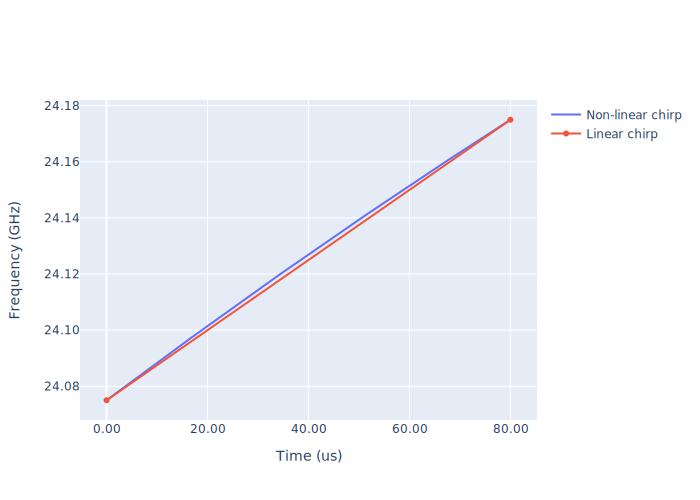

In [2]:
import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.display import SVG, display

plot_nonlinear = go.Scatter(
    x=np.linspace(0, 80e-6, 100)*1e6,
    y=freq_nonlinear/1e9,
    name='Non-linear chirp',
)

plot_linear = go.Scatter(
    x=np.array([0, 80e-6])*1e6,
    y=np.array([24.125e9-50e6, 24.125e9+50e6])/1e9,
    name='Linear chirp',
)

data = [plot_nonlinear, plot_linear]

layout = go.Layout(
    yaxis=dict(tickformat='.2f', title='Frequency (GHz)'),
    xaxis=dict(tickformat='.2f', title='Time (us)'),
)

fig = go.Figure(data, layout=layout)
# iplot(fig)
display(SVG(fig.to_image(format='svg', scale=1)))

 ### Receiver
 The parameters of the receiver are listed in the table below.

 | Parameter                        | Variable in `RadarSimPy` | Value        |
 |----------------------------------|--------------------------|--------------|
 | Sampling rate ($f_s$)            | fs                       | 2 Msps       |
 | Noise figure ($NF$)              | noise_figure             | 12 dB        |
 | RF gain/loss ($G_{rf}$)          | rf_gain                  | 20 dB        |
 | Load resistor ($R_L$)            | load_resistor            | 500 $\Omega$ |
 | Baseband voltage gain ($G_{BB}$) | baseband_gain            | 30 dB        |

 The radiation pattern os the receiver antenna is $\cos{\theta}$. The gain of the antenna is 6 dB.

In [3]:
rx_channel = dict(
    location=(0, 0, 0),
    azimuth_angle=angle,
    azimuth_pattern=pattern,
    elevation_angle=angle,
    elevation_pattern=pattern,
)

rx = Receiver(fs=2e6,
              noise_figure=12,
              rf_gain=20,
              load_resistor=500,
              baseband_gain=30,
              channels=[rx_channel])

 Create the FMCW radar model based on all the parameters defined above.

In [4]:
radar_nonlinear = Radar(transmitter=tx_nonlinear, receiver=rx)
radar_linear = Radar(transmitter=tx_linear, receiver=rx)

 ### Targets
 The propertities of targets are defined here. There are 3 targets in this simulation. The locations of the targets are defined through $(x, y, z)$ coordinates in meters, and the speeds of the targets are defined trough $(v_x, v_y, v_z)$ in $m/s$. The propertites of the targets also includes radar cross-section (RCS (dBsm)) and phase (radian).

In [5]:
target_1 = dict(location=(200, 0, 0), speed=(-5, 0, 0), rcs=20, phase=0)
target_2 = dict(location=(95, 20, 0), speed=(-50, 0, 0), rcs=15, phase=0)
target_3 = dict(location=(30, -5, 0), speed=(-22, 0, 0), rcs=5, phase=0)

targets = [target_1, target_2, target_3]

## Simulate Baseband Signals
 
Calculate baseband signal matrix:
$$[channel, slow~time, fast~time]$$
 
#### Simulate with C++ engine

In [6]:
from radarsimpy.simulator import simc

data_nonlinear = simc(radar_nonlinear, targets, noise=True)
time_matrix_nonlinear = data_nonlinear['timestamp']
data_matrix_nonlinear = data_nonlinear['baseband']

data_linear = simc(radar_linear, targets, noise=True)
time_matrix_linear = data_linear['timestamp']
data_matrix_linear = data_linear['baseband']

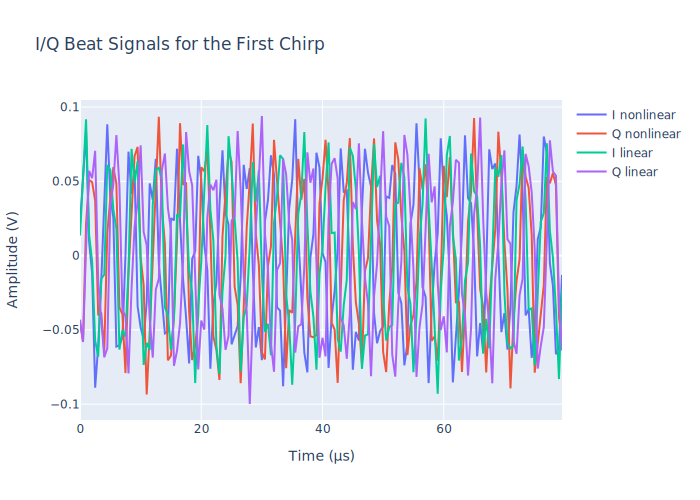

In [7]:
beat_I_nonlinear = go.Scatter(
    x=time_matrix_nonlinear[0, 0, :] * 1e6,
    y=np.real(data_matrix_nonlinear[0, 0, :]),
    name='I nonlinear',
)
beat_Q_nonlinear = go.Scatter(
    x=time_matrix_nonlinear[0, 0, :] * 1e6,
    y=np.imag(data_matrix_nonlinear[0, 0, :]),
    name='Q nonlinear',
)
beat_I_linear = go.Scatter(
    x=time_matrix_linear[0, 0, :] * 1e6,
    y=np.real(data_matrix_linear[0, 0, :]),
    name='I linear',
)
beat_Q_linear = go.Scatter(
    x=time_matrix_linear[0, 0, :] * 1e6,
    y=np.imag(data_matrix_linear[0, 0, :]),
    name='Q linear',
)
data = [beat_I_nonlinear, beat_Q_nonlinear, beat_I_linear, beat_Q_linear]

layout = go.Layout(
    title='I/Q Beat Signals for the First Chirp',
    yaxis=dict(title='Amplitude (V)'),
    xaxis=dict(title='Time (µs)'),
)


fig = go.Figure(data, layout=layout)
# iplot(fig)
display(SVG(fig.to_image(format='svg', scale=1)))

 ## Radar Signal Processing
 ### Range profile

In [8]:
from scipy import signal
import radarsimpy.processing as proc

range_window = signal.chebwin(radar_linear.samples_per_pulse, at=60)

range_profile_nonlinear = proc.cal_range_profile(
    radar_nonlinear, data_matrix_nonlinear[:, :, :], range_window)
range_profile_linear = proc.cal_range_profile(
    radar_linear, data_matrix_linear[:, :, :], range_window)

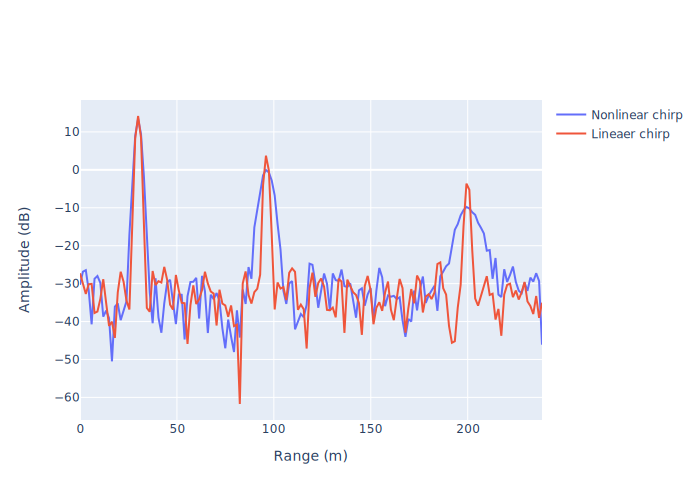

In [9]:
range_axis = np.linspace(
    0, radar_linear.max_range, radar_linear.samples_per_pulse, endpoint=False)

s1 = go.Scatter(
    x=range_axis,
    y=20 * np.log10(np.abs(range_profile_nonlinear[0, 0, :])),
    name='Nonlinear chirp',
)

s2 = go.Scatter(
    x=range_axis,
    y=20 * np.log10(np.abs(range_profile_linear[0, 0, :])),
    name='Lineaer chirp',
)


data = [s1, s2]

layout = go.Layout(
    yaxis=dict(title='Amplitude (dB)'),
    xaxis=dict(title='Range (m)'),
)

fig = go.Figure(data, layout=layout)
# iplot(fig)
display(SVG(fig.to_image(format='svg', scale=1)))